In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential2
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA",
	"training_date": "earlier", # values: earlier, current
	"mode": "evidential2", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": True,
	"learning_rate": 1e-4,
    "use_cloud_mask": True,
    "mask_out_non_biome": False
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
elif config['mode'] == 'evidential2':
	patchesHandler = PatchesHandlerEvidential2()
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': 
			# exp = 6
			repetition_id = 0
			exp = 8

		elif config['training_date'] == 'earlier': 
			exp = 1; repetition_id = 7
			exp = 50; repetition_id = 0
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 53; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 52; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 13; repetition_id = 0		

	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			# exp = 1; repetition_id = 0		
			exp = 60; repetition_id = 0		
			

else:

	exp = 60
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'PA', 'training_date': 'earlier', 'mode': 'evidential2', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': True, 'learning_rate': 0.0001, 'use_cloud_mask': True, 'mask_out_non_biome': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:628 in __init__()- list(self.date_ids): [0]
ic| dataset.py:649 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:189 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:190 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
dates

[2017, 2018]

In [9]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'PA',
 'training_date': 'earlier',
 'mode': 'evidential2',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': True,
 'learning_rate': 0.0001,
 'use_cloud_mask': True,
 'mask_out_non_biome': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [10]:
exp

60

In [11]:
manager.setExperimentPath()
manager.createLogFolders()

In [12]:
# ic(type(dataset), exp, dataset.dates)


In [107]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:726 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2018) = 1


ic| dataset.py:729 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:733 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:737 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:739 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:718 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


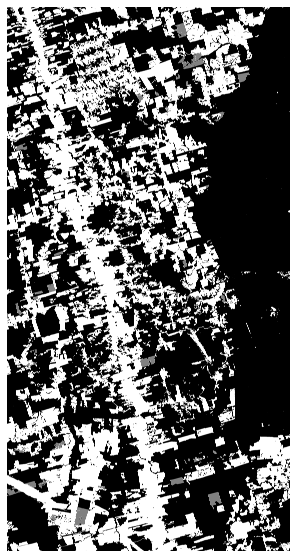

In [14]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [15]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [16]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [17]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([4111106,   21154, 4023540], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([4137906,  132186, 3885708], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([4127592,  330988, 3697220], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6352853,   87028, 1715919], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([4016558,   56855, 4082387], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4410117,   63289, 3682394], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([5066168,   26076, 3063556], dtype=int64))
Set 8 (array([0, 1, 2], dtype=uint8), array([8144040,    5335,    6425], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5308876,  134178, 2712746], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3567040,   45932, 4542828], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4767546,   84994, 3303260], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), ar

In [18]:

manager.label_mask.dtype

dtype('uint8')

In [19]:

manager.getLabelCurrentDeforestation()

In [20]:

manager.loadInputImage()

ic| dataset.py:669 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [21]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.09090909, 0.18181819, 0.27272728, 0.36363637,
        0.45454547, 0.54545456, 0.6363636 , 0.72727275, 0.8181819 ,
        0.90909094, 1.        ], dtype=float32),
 array([106259630,    644713,    968315,   1458862,   1560879,   2477424,
          1299508,    903419,    864429,   4570932,   3150455,  38957434],
       dtype=int64))

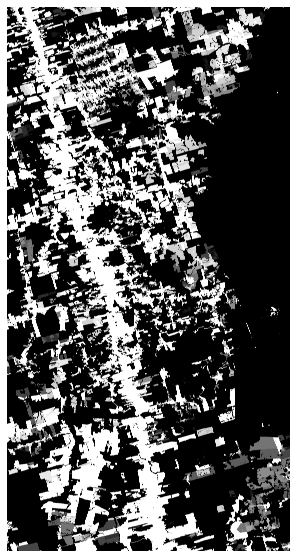

In [22]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

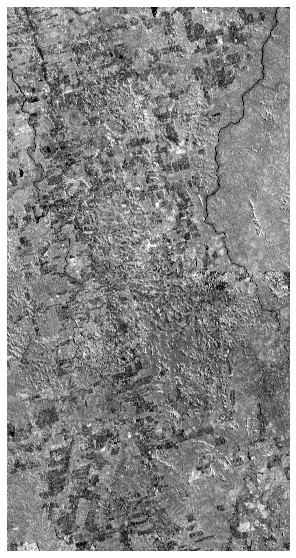

In [23]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [24]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([103173071,   1861735,  58081194], dtype=int64))

In [25]:
# manager.maskNoDataAsNotConsideredClass()

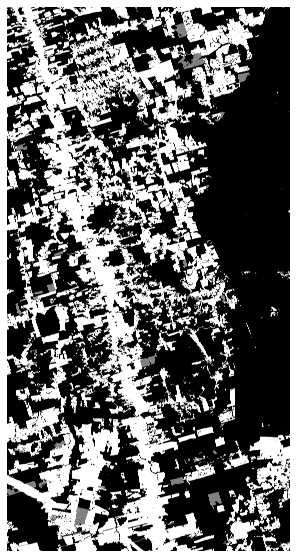

In [26]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [27]:

manager.getImageChannels()

ic| base.py:150 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:152 in getImageChannels()- self.channels: 21


In [28]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


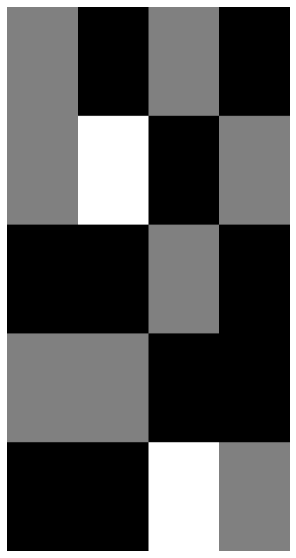

In [29]:
manager.logger.plotFigure(manager.mask_train_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [30]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [31]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([39417989,   659337, 25169074], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9475311,  279643, 6556646], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([54279771,   922755, 26355474], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([103173071,   1861735,  58081194], dtype=int64))


In [32]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.6041 0.0101 0.3858]
val unique [0.5809 0.0171 0.402 ]
test unique [0.6655 0.0113 0.3232]


In [33]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:28 in create_idx_image()
    im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| patchesHandler.py:29 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:35 in create_idx_image()
    im_idx.shape: (17730, 9200, 2)
    im_idx.dtype: dtype('uint16')


In [34]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:47 in extract_patches()
    coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:51 in extract_patches()
    coords.shape: (110896, 2)
    coords.dtype: dtype('uint16')


In [35]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:168 in trainTestSplit()
    self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [36]:
if config["training"] == True:
    manager.label_mask.shape

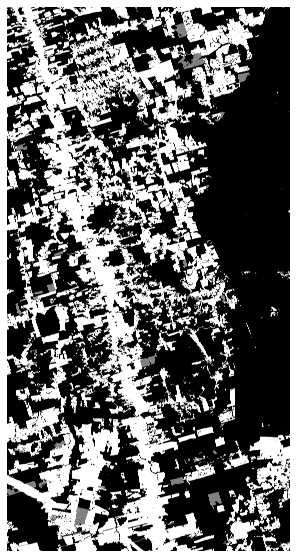

In [37]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [38]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [39]:
if config["training"] == True:
    print(manager.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [40]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (3369, 3) validation samples:  (1184, 3)


In [41]:
if config["training"] == True:
    inputSnipShow = True

In [42]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [43]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [46]:
manager.dataset.bands

10

[2432 6688    0]
coord [2432 6688    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.55678153
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.57993275


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


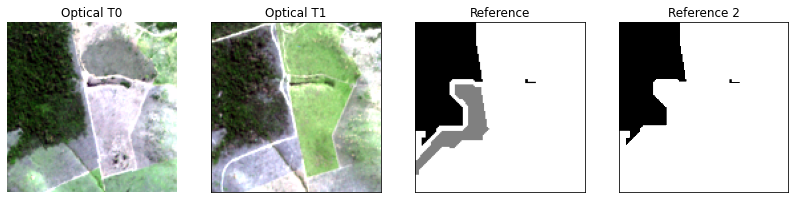

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.17011994
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.19372104
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 570 5358    0]
coord [ 570 5358    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


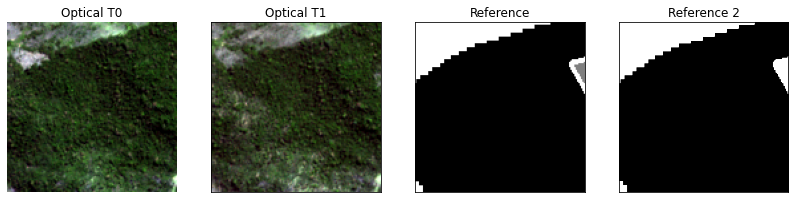

In [48]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.097635716
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.28070197


[1558 6194    0]
coord [1558 6194    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


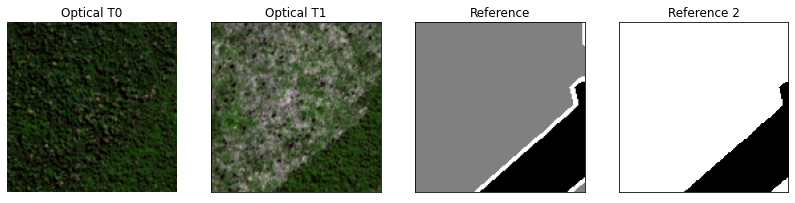

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.63875556
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]):

[1368 6194    0]
coord [1368 6194    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


 0.5750163
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


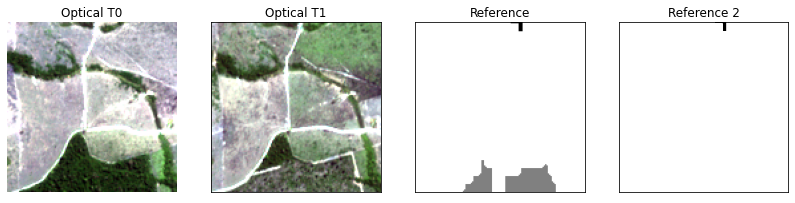

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.63875556
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.5750163


[1368 6194    0]
coord [1368 6194    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


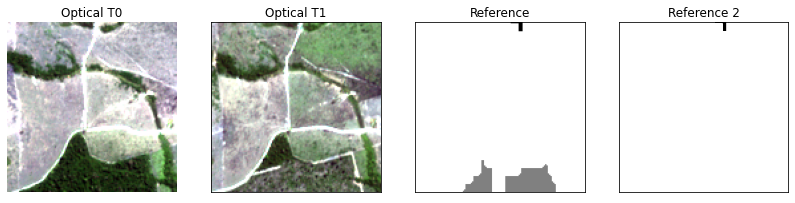

In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [52]:
if config["training"] == True:
    manager.getGenerators()


In [53]:
if config["training"] == True:
    manager.fixChannelNumber()

In [54]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/PA/exp60


In [55]:
if config["training"] == True:
    print(manager.channels)

21


In [56]:
if config["training"] == True:
    print(manager.image_stack.shape)

(17730, 9200, 21)


In [57]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [70]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
____________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


New best val loss. Val loss: 0.09203. Early stop count: 0
Epoch: 2
Anneling Coeficient [0.1]
315/315 [==============================] - 31s 98ms/step - loss: 0.0594 - accuracy: 0.5645 - loss_error_term: 0.2893 - loss_variance_term: 0.0724 - val_loss: 0.0678 - val_accuracy: 0.6453 - val_loss_error_term: 0.2554 - val_loss_variance_term: 0.0559

Epoch 00001: val_loss improved from 0.09203 to 0.06781, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp60/models\resunet_0.h5
New best val loss. Val loss: 0.06781. Early stop count: 0
Epoch: 3
Anneling Coeficient [0.2]
315/315 [==============================] - 31s 98ms/step - loss: 0.0515 - accuracy: 0.5709 - loss_error_term: 0.2761 - loss_variance_term: 0.0706 - val_loss: 0.0591 - val_accuracy: 0.6542 - val_loss_error_term: 0.2395 - val_loss_variance_term: 0.0584

Epoch 00001: val_loss improved from 0.06781 to 0.05906, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp60/models\resunet_0.h5
New best val loss. V

In [83]:
def plotHistory(manager):
    print(manager.history)
    len_history = len(manager.history)
    loss_error_term = [manager.history[x]['loss_error_term'] for x in range(len_history)]
    loss_variance_term = [manager.history[x]['loss_variance_term'] for x in range(len_history)]
    loss = [manager.history[x]['loss'] for x in range(len_history)]

    val_loss_error_term = [manager.history[x]['val_loss_error_term'] for x in range(len_history)]
    val_loss_variance_term = [manager.history[x]['val_loss_variance_term'] for x in range(len_history)]
    val_loss = [manager.history[x]['val_loss'] for x in range(len_history)]

    plt.clf()
    plt.plot(loss_error_term)
    plt.plot(val_loss_error_term)
    plt.title('Loss error term')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    
    plt.savefig('loss_error_history_evidential_exp{}.png'.format(manager.exp))

    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.savefig('loss_history_evidential_exp{}.png'.format(manager.exp))

    plt.figure()
    plt.plot(loss_variance_term)
    plt.plot(val_loss_variance_term)
    plt.title('Loss variance term')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.savefig('loss_variance_history_evidential_exp{}.png'.format(manager.exp))


[{'loss': [0.10561445355415344], 'accuracy': [0.520736813545227], 'loss_error_term': [0.36314159631729126], 'loss_variance_term': [0.0861460268497467], 'val_loss': [0.09202596545219421], 'val_accuracy': [0.6218963265419006], 'val_loss_error_term': [0.29450634121894836], 'val_loss_variance_term': [0.061247359961271286]}, {'loss': [0.05944022536277771], 'accuracy': [0.564525306224823], 'loss_error_term': [0.2892579734325409], 'loss_variance_term': [0.07240810245275497], 'val_loss': [0.06780539453029633], 'val_accuracy': [0.6453083753585815], 'val_loss_error_term': [0.25540873408317566], 'val_loss_variance_term': [0.055874016135931015]}, {'loss': [0.05145544558763504], 'accuracy': [0.5708519220352173], 'loss_error_term': [0.27612027525901794], 'loss_variance_term': [0.07059646397829056], 'val_loss': [0.05906474590301514], 'val_accuracy': [0.6541680693626404], 'val_loss_error_term': [0.23953542113304138], 'val_loss_variance_term': [0.058378998190164566]}, {'loss': [0.048280343413352966], '

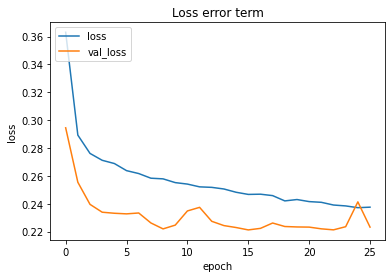

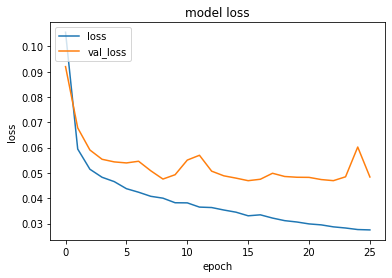

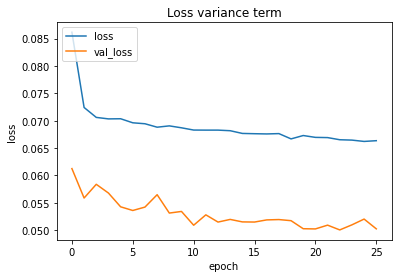

In [84]:
plotHistory(manager)

In [85]:
manager.history[0]['loss_error_term']

[0.36314159631729126]

In [86]:
if config["training"] == True and config["mode"] != 'evidential2':
    manager.plotHistory()


In [87]:
repetition_id = 0

In [88]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [89]:
manager.image_stack.shape

(17730, 9200, 21)

In [90]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [91]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [92]:
manager.image_stack.shape

(17730, 9200, 21)

In [93]:
manager.setPadding()

-30.0 -16.0


In [94]:
manager.infer()

ic| multioutput.py:171 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/PA/exp60/models/resunet_0.h5'


Dropout training mode: False
time:  0
alpha.shape (17760, 9216, 2)
S.shape (17760, 9216)
K 2
u.shape (17760, 9216)
belief.shape (17760, 9216, 2)
Inference runtime 70.76


In [95]:
manager.prob_rec.shape

(17760, 9216, 2)

In [96]:
manager.loadPredictedProbabilities()

In [97]:
manager.prob_rec.shape

(17760, 9216, 2)

In [98]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [99]:
manager.prob_rec.shape

(17760, 9216, 2)

In [100]:
manager.getMeanProb()

In [101]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.31479818
    np.max(value): 0.9949598


In [104]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (17760, 9216, 2)


(17760, 9216, 2)

In [128]:
manager.label_mask.shape

(17730, 9200)

In [127]:
manager.label_mask = manager.label_mask[:manager.image_stack.shape[0], :manager.image_stack.shape[1],:]

In [129]:
manager.unpadMeanProb()

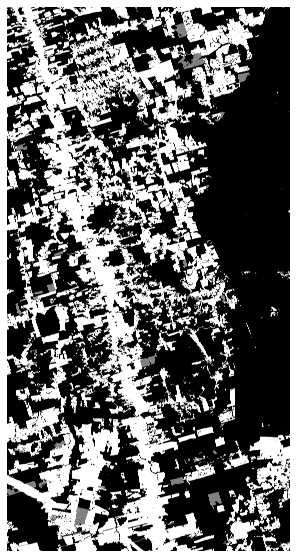

In [130]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [131]:
manager.squeezeLabel()

In [132]:
manager.mean_prob.shape

(17730, 9200, 2)

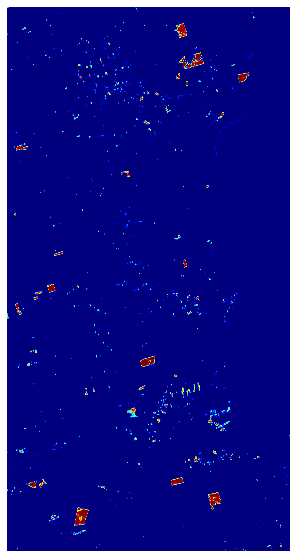

In [133]:
manager.logger.plotFigure(manager.mean_prob[...,1], 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [134]:
print(manager.label_mask.shape)

(17730, 9200)


In [135]:
# manager.getLabelTest()

In [136]:
# manager.getMAP()

In [137]:
manager.prob_rec.shape

(17760, 9216, 2)

In [138]:
# manager.preprocessProbRec()
# print(manager.prob_rec.shape)

In [139]:
manager.prob_rec.shape

(17760, 9216, 2)

In [140]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.31479818
    np.max(value): 0.9949598


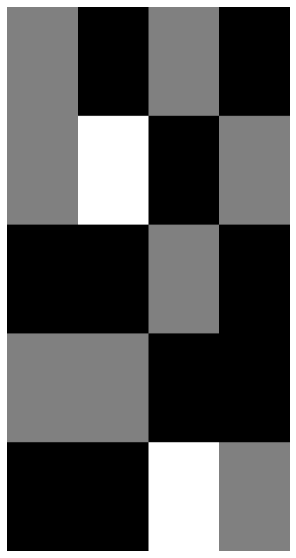

In [141]:
manager.logger.plotFigure(manager.mask_train_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [142]:
manager.getLabelCurrentDeforestation()

In [143]:
manager.classes_mode

True

In [144]:
manager.applyProbabilityThreshold()

(17730, 9200, 2)


In [145]:
manager.setMeanProbNotConsideredAreas()


In [146]:
manager.getTestValues()

ic| base.py:491 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:500 in getTestValues()- predicted_test.shape: (55202526,)


In [147]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0, 1], dtype=int8), array([160742338,   2373662], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0, 1], dtype=int8), array([161088573,   2027427], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0, 1], dtype=int8), array([162769765,    346235], dtype=int64))


In [148]:
manager.calculateMetrics()

ic| base.py:544 in calculateMetrics()
    self.f1: 72.39
    self.precision: 68.0
    self.recall: 77.39


In [149]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| multioutput.py:249 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)
ic| multioutput.py:255 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9718842,)
ic| base.py:555 in calculateMetricsValidation()
    f1_val: 85.24
    precision_val: 83.24
    recall_val: 87.35
    mAP_val: 86.76


In [150]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [151]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:726 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2018) = 1


ic| dataset.py:729 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:733 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:737 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:739 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:718 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


In [152]:
manager.getErrorMask()

(array([0, 1], dtype=int16), array([162200764,    915236], dtype=int64))


In [153]:
manager.getErrorMaskToShowRGB()

[0 1]


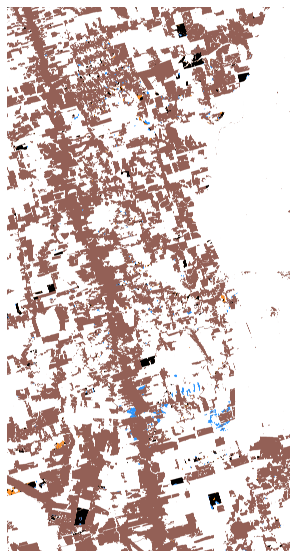

In [154]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [155]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [156]:
manager.setUncertainty()

In [157]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [158]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:123 in getStats()
    np.min(value): 0.0050402004
    np.mean(value): 0.37040454
    np.max(value): 1.0


In [159]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.024265887
    np.max(value): 1.0


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

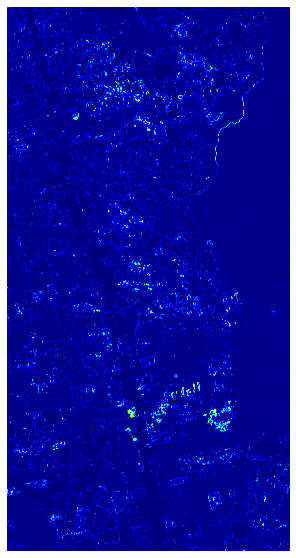

In [160]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



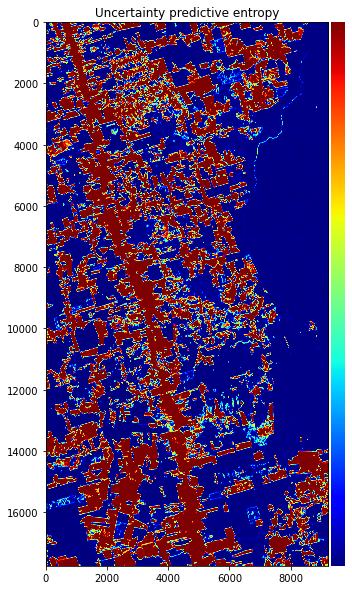

In [161]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [162]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:595 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:596 in getTestValues2()
    self.mask_test.shape: (17730, 9200)
ic| base.py:600 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:608 in getTestValues2()
    self.error_mask_test.shape: (55020219,)


In [163]:
import src.plot as _plt
'''
def plotCropSample(self, manager):
    uncertainty_vlims = [np.min(manager.uncertainty_to_show), np.max(manager.uncertainty_to_show)]

    self.plotCropSampleFlag = True
    if self.plotCropSampleFlag == True:
        ic(manager.dataset.previewLims1, manager.dataset.previewLims2)
        lims = manager.dataset.previewLims1
        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = manager.dataset.previewLims2
        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims1, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        save_name = 'output/figures/{}PredictSampleUncertainty1_exp{}.png'.format(
            manager.dataset.__class__.__name__, str(manager.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims2, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        save_name = 'output/figures/{}PredictSampleUncertainty2_exp{}.png'.format(
            manager.dataset.__class__.__name__, str(manager.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims2, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + manager.dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar.png', dpi=150, bbox_inches='tight')
'''

"\ndef plotCropSample(self, manager):\n    uncertainty_vlims = [np.min(manager.uncertainty_to_show), np.max(manager.uncertainty_to_show)]\n\n    self.plotCropSampleFlag = True\n    if self.plotCropSampleFlag == True:\n        ic(manager.dataset.previewLims1, manager.dataset.previewLims2)\n        lims = manager.dataset.previewLims1\n        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = manager.dataset.previewLims2\n        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], \n                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, \n                lims = manager.dataset.previewLims1, \n                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],\n             

In [164]:

# import types
# manager.logger.plotCropSample = types.MethodType(plotCropSample, manager.logger)


In [165]:
## manager.logger.plotCropSample(manager)

In [166]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [167]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [168]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

In [169]:
# manager.logger.plotCropSampleT0T1(manager)

In [170]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:123 in getStats()
    np.min(value): 0.0050402004
    np.mean(value): 0.035680063
    np.max(value): 1.0


In [171]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [172]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [173]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [174]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [175]:
manager.config['uncertainty_method'] = 'evidential2'

In [176]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "evidential2":
                self.threshold_list = list(np.linspace(np.min(self.uncertainty)+0.0000001, np.max(self.uncertainty)-0.005, 11))[1:]

    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [177]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)


Get precision-recall threshold

In [178]:

manager.getUncertaintyAAValues()

ic| 4112614954.py:65 in getUncertaintyAAValues()
    self.uncertainty.shape: (55020219,)
    self.label_mask_current_deforestation_test.shape: (55020219,)


[0.10403627038445712, 0.20303224034173967, 0.3020282102990222, 0.40102418025630476, 0.5000201502135873, 0.5990161201708698, 0.6980120901281524, 0.7970080600854349, 0.8960040300427174, 0.995]
threshold 0.10403627038445712


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (3941398,)
    predicted_test_high_uncertainty.shape: (3941398,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3941398
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3941398
    len(label_mask_current_deforestation_test): 55020219


[0.9423331  0.86114743 0.48022123 0.07163545 0.46725473 0.66394934
 0.10484585]
threshold 0.20303224034173967


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (2290722,)
    predicted_test_high_uncertainty.shape: (2290722,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2290722
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2290722
    len(label_mask_current_deforestation_test): 55020219


[0.88411981 0.84532847 0.58403091 0.04163419 0.39759581 0.61430521
 0.14524648]
threshold 0.3020282102990222


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (1481024,)
    predicted_test_high_uncertainty.shape: (1481024,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1481024
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1481024
    len(label_mask_current_deforestation_test): 55020219


[0.84197559 0.83232438 0.64020239 0.02691781 0.35392295 0.57928955
 0.17570948]
threshold 0.40102418025630476


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (1024323,)
    predicted_test_high_uncertainty.shape: (1024323,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1024323
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1024323
    len(label_mask_current_deforestation_test): 55020219


[0.80749265 0.82120347 0.67577561 0.01861721 0.32574487 0.55418802
 0.19073268]
threshold 0.5000201502135873


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (699635,)
    predicted_test_high_uncertainty.shape: (699635,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 699635
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 699635
    len(label_mask_current_deforestation_test): 55020219


[0.77429213 0.80996186 0.703139   0.01271596 0.3076518  0.5366623
 0.18843319]
threshold 0.5990161201708698


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (366509,)
    predicted_test_high_uncertainty.shape: (366509,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 366509
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 366509
    len(label_mask_current_deforestation_test): 55020219


[0.72638931 0.79318379 0.73731096 0.00666135 0.2972988  0.51967354
 0.13540551]
threshold 0.6980120901281524


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (123672,)
    predicted_test_high_uncertainty.shape: (123672,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 123672
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 123672
    len(label_mask_current_deforestation_test): 55020219


[0.68723521 0.78010049 0.76236445 0.00224776 0.40052304 0.50814398
 0.04049209]
threshold 0.7970080600854349


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (46861,)
    predicted_test_high_uncertainty.shape: (46861,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 46861
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 46861
    len(label_mask_current_deforestation_test): 55020219


[0.68127863 0.77663022 0.77058798 0.00085171 0.47059774 0.42794182
 0.01289315]
threshold 0.8960040300427174


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (13581,)
    predicted_test_high_uncertainty.shape: (13581,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 13581
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 13581
    len(label_mask_current_deforestation_test): 55020219


[6.80009090e-01 7.75116113e-01 7.72901313e-01 2.46836531e-04
 6.50805271e-01 3.55600000e-01 3.95462035e-03]
threshold 0.995


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (1365,)
    predicted_test_high_uncertainty.shape: (1365,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1365
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1365
    len(label_mask_current_deforestation_test): 55020219


[6.79970475e-01 7.74360704e-01 7.73893395e-01 2.48090616e-05
 6.36363636e-01 3.97727273e-02 1.00320290e-03]


In [179]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:736 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (55020219,)
    self.label_mask_current_deforestation_test.shape: (55020219,)


threshold 0.10403627038445712
(55020219,) (55020219,)
cm_audited [[54119579    25712]
 [   67747   807181]]
[0.96912929 0.92256849]
threshold 0.20303224034173967
(55020219,) (55020219,)
cm_audited [[54078317    66974]
 [   93496   781432]]
[0.92105902 0.89313864]
threshold 0.3020282102990222
(55020219,) (55020219,)
cm_audited [[54040164   105127]
 [  112841   762087]]
[0.87877617 0.87102824]
threshold 0.40102418025630476
(55020219,) (55020219,)
cm_audited [[54004335   140956]
 [  128731   746197]]
[0.84111422 0.85286675]
threshold 0.5000201502135873
(55020219,) (55020219,)
cm_audited [[53965960   179331]
 [  144341   730587]]
[0.80291521 0.83502528]
threshold 0.5990161201708698
(55020219,) (55020219,)
cm_audited [[53902302   242989]
 [  168203   706725]]
[0.74414508 0.80775218]
threshold 0.6980120901281524
(55020219,) (55020219,)
cm_audited [[53841729   303562]
 [  188022   686906]]
[0.6935166  0.78510003]
threshold 0.7970080600854349
(55020219,) (55020219,)
cm_audited [[53829877   315

ic| base.py:742 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.96912929, 0.92256849],
                                  [0.92105902, 0.89313864],
                                  [0.87877617, 0.87102824],
                                  [0.84111422, 0.85286675],
                                  [0.80291521, 0.83502528],
                                  [0.74414508, 0.80775218],
                                  [0.6935166 , 0.78510003],
                                  [0.68345594, 0.77836805],
                                  [0.68081152, 0.77575869],
                                  [0.68014008, 0.77449687]])


cm_audited [[53826612   318679]
 [  197299   677629]]
[0.68014008 0.77449687]


In [180]:
manager.setPlotLimsForUncertaintyAA()

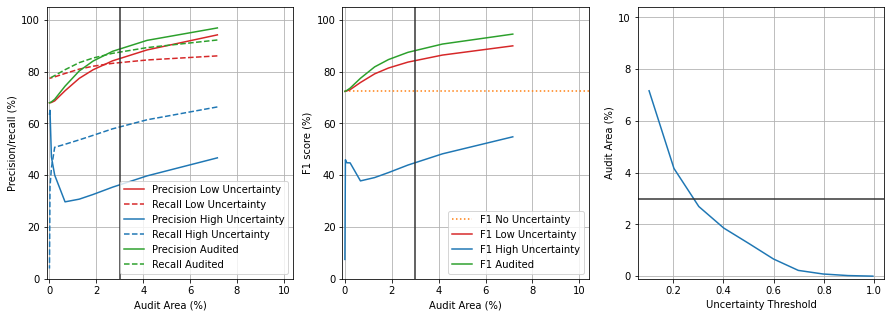

In [181]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [182]:
from scipy import optimize  

def getOptimalUncertaintyThreshold(self, AA = 0.03, bounds = None):

    def getAAFromUncertaintyThreshold(threshold): 
        print(threshold)
        metrics_values2 = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, [threshold])
        return np.abs(AA - metrics_values2[:,3].squeeze())
    if bounds is None:
        bounds = (np.min(self.uncertainty) + 0.0015, np.max(self.uncertainty)-0.0015)
    
    ic(bounds)
    minimum = optimize.minimize_scalar(getAAFromUncertaintyThreshold, 
        method='bounded', bounds=bounds, tol=0.0001)
    self.threshold_optimal = minimum.x
    ic(self.threshold_optimal)

In [183]:

import types

manager.getOptimalUncertaintyThreshold = types.MethodType(getOptimalUncertaintyThreshold, manager)


In [184]:
manager.getOptimalUncertaintyThreshold(bounds = (np.min(manager.uncertainty)+0.0000001, np.max(manager.uncertainty)-0.01))

ic| 2231348037.py:14 in getOptimalUncertaintyThreshold()
    bounds: (0.0050403004271745684, 0.99)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38126142811510855
threshold 0.38126142811510855


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (1100075,)
    predicted_test_high_uncertainty.shape: (1100075,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1100075
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1100075
    len(label_mask_current_deforestation_test): 55020219


[0.81385515 0.82333986 0.66964024 0.01999401 0.33065504 0.55859303
 0.18883945]
0.6137788723120658
threshold 0.6137788723120658


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (314222,)
    predicted_test_high_uncertainty.shape: (314222,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 314222
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 314222
    len(label_mask_current_deforestation_test): 55020219


[0.71778844 0.79020379 0.74300171 0.00571103 0.30003771 0.51755544
 0.11896116]
0.23755774462413193
threshold 0.23755774462413193


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (1947664,)
    predicted_test_high_uncertainty.shape: (1947664,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1947664
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1947664
    len(label_mask_current_deforestation_test): 55020219


[0.86835113 0.84055434 0.60699166 0.03539906 0.3801116  0.60073875
 0.15747053]
0.10407295127594646
threshold 0.10407295127594646


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (3940455,)
    predicted_test_high_uncertainty.shape: (3940455,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3940455
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3940455
    len(label_mask_current_deforestation_test): 55020219


[0.94230851 0.86114191 0.48028409 0.07161831 0.46721419 0.66392216
 0.10486296]
0.29244766740912786
threshold 0.29244766740912786


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (1539052,)
    predicted_test_high_uncertainty.shape: (1539052,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1539052
    len(label_mask_current_deforestation_test): 55020219
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1539052
    len(label_mask_current_deforestation_test): 55020219


KeyboardInterrupt: 

In [ ]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.1883752582176674
threshold 0.1883752582176674


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_high_uncertainty.shape: (2685494,)
    predicted_test_high_uncertainty.shape: (2685494,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2685494
    len(label_mask_current_deforestation_test): 89522602
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2685494
    len(label_mask_current_deforestation_test): 89522602


[0.65766657 0.710004   0.64018496 0.02999794 0.16435787 0.57610118
 0.124361  ]
threshold 0.1883752582176674
(89522602,) (89522602,)


ic| base.py:880 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999794]),
                     'UEO': array([0.124361]),
                     'f1': 60.12,
                     'f1_H': array([0.25575152]),
                     'f1_L': array([0.68283387]),
                     'precision_H': array([0.16435787]),
                     'precision_L': array([0.65766657]),
                     'recall_H': array([0.57610118]),
                     'recall_L': array([0.710004]),
                     'recall_Ltotal': array([0.64018496])}
ic| base.py:881 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.71294254]),
                             'precision': array([0.68907649]),
                             'recall': array([0.73852108])}


cm_audited [[87781656   435139]
 [  341441   964366]]
[0.68907649 0.73852108]


{'metrics': {'precision_L': array([0.65766657]),
  'recall_L': array([0.710004]),
  'recall_Ltotal': array([0.64018496]),
  'AA': array([0.02999794]),
  'precision_H': array([0.16435787]),
  'recall_H': array([0.57610118]),
  'UEO': array([0.124361]),
  'f1_L': array([0.68283387]),
  'f1_H': array([0.25575152]),
  'f1': 60.12},
 'metrics_audited': {'precision': array([0.68907649]),
  'recall': array([0.73852108]),
  'f1': array([0.71294254])},
 'exp': 60}

In [ ]:
print("A")

A
